In [1]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img, save_img
import os
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
def augment_single_class(dir_path, generator, iteration):
    files = os.listdir(dir_path)
    try:
        files.remove('.DS_Store')
    except:
        x=1
    files = list(filter(lambda f: f[0] != '_', files))
    
    for file in files:
        img = load_img(dir_path + '/' + file)
        x = img_to_array(img)
        x_transformed = generator.random_transform(x)
        
        should_mess_up_colors = np.random.choice([0,1])
        if should_mess_up_colors == 1:
            x_transformed = mess_up_colors(x_transformed)
        else:
            x_transformed = swith_colors(x_transformed)
        
        img_transformed = array_to_img(x_transformed)
        save_img(dir_path + '/_' + str(iteration) + '_' + file, img_transformed)
        
def augment(path, generator, factor):
    dirs = os.listdir(path)
    try:
        dirs.remove('.DS_Store')
    except:
        x=1
    for i, dir in enumerate(dirs):
        for j in range(factor - 1):
            augment_single_class(path + '/' + dir, generator, j)
        print('Class ' + str(i) + ' ' + dir + ' augmented.')
        
def swith_colors(x):
    channels = np.random.permutation(x.shape[2])
    x = x[:,:,channels]
    return x

def mess_up_colors(x):
    #channel = np.random.choice([0,1,2])
    for channel in range(3):
        intensity = np.random.uniform(0,1.5)
        x[:,:,channel] *= intensity
    return np.clip(x, 0, 255)

In [3]:
generator = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=15,
    shear_range=15,
    brightness_range=(0.5, 2),
    fill_mode='constant',
    cval=0,
)

## Preview

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


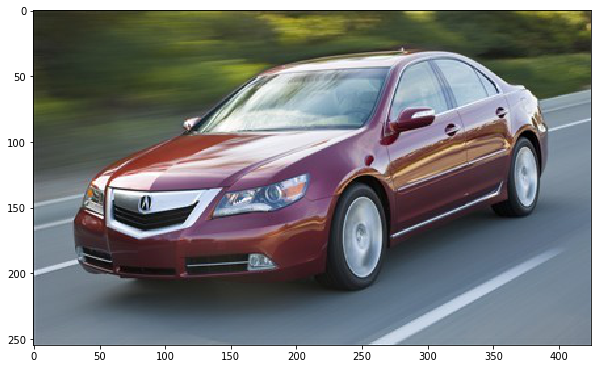

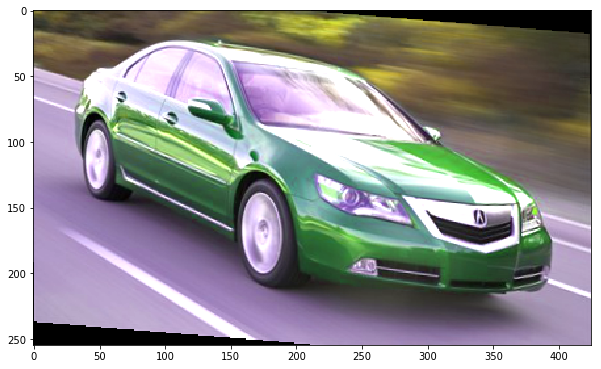

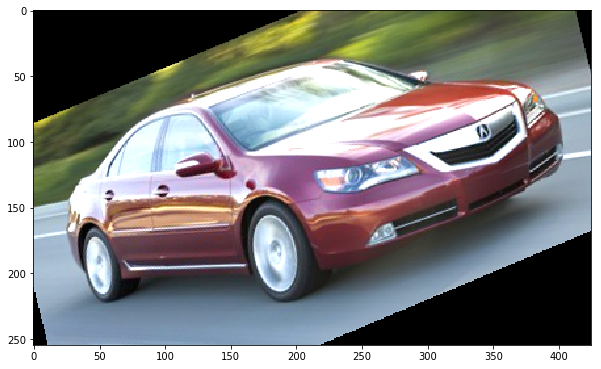

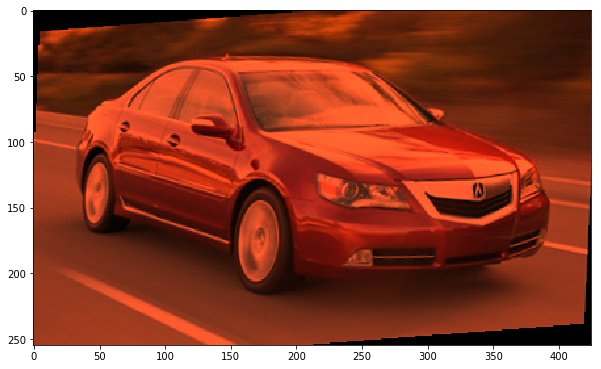

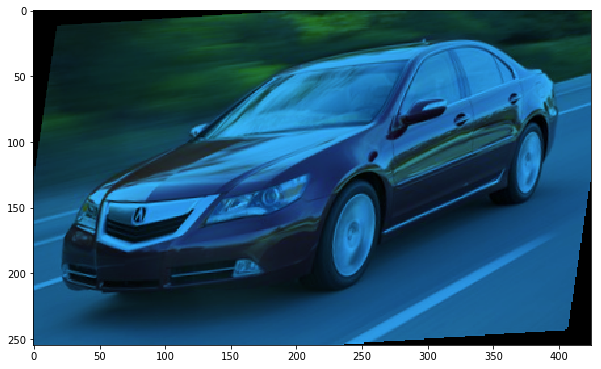

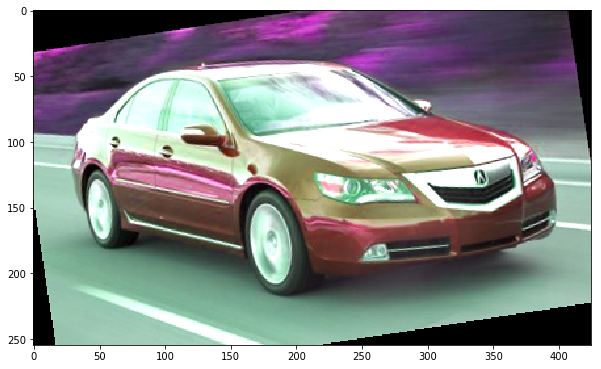

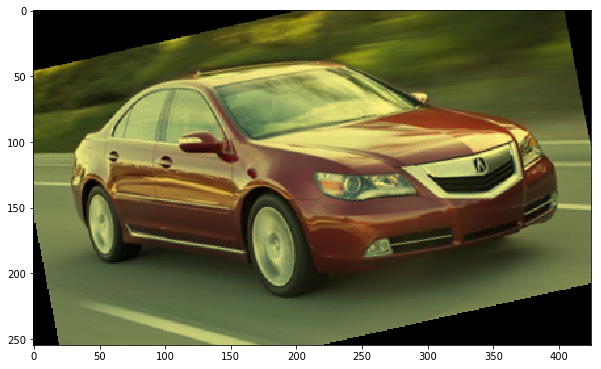

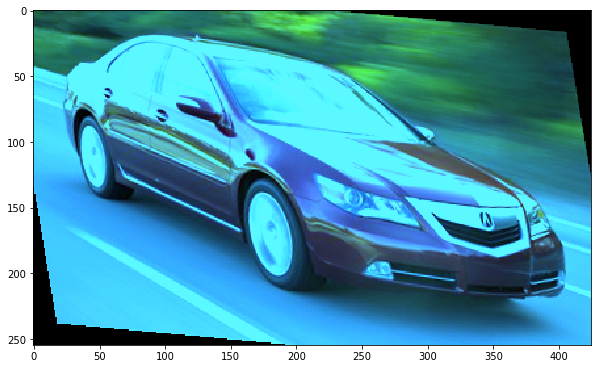

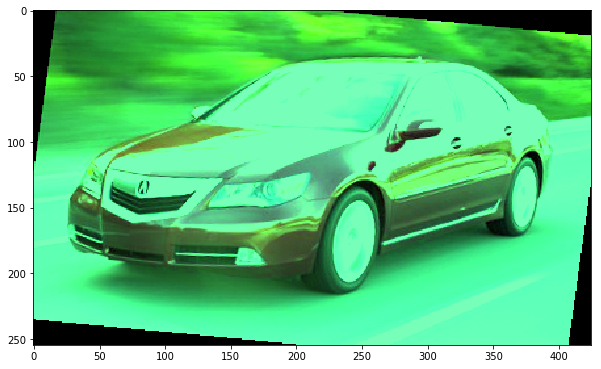

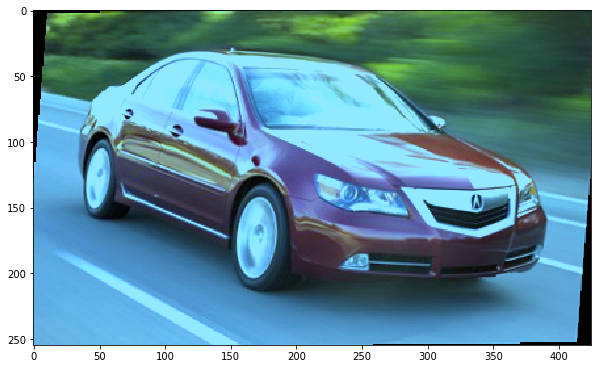

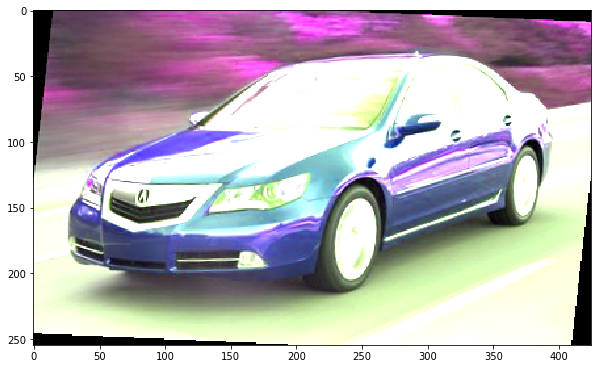

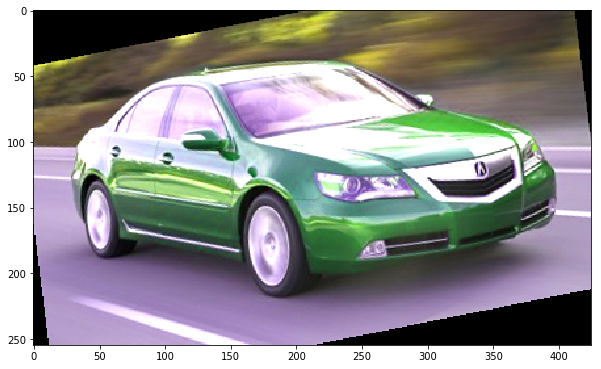

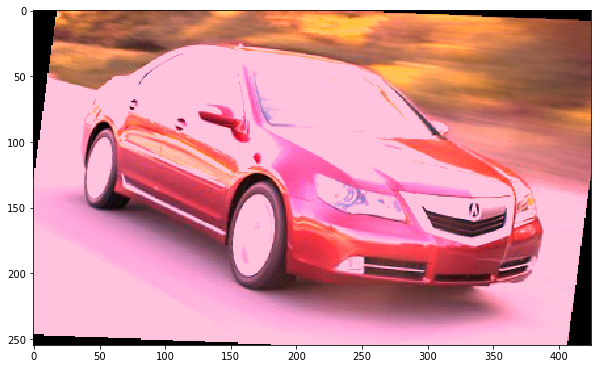

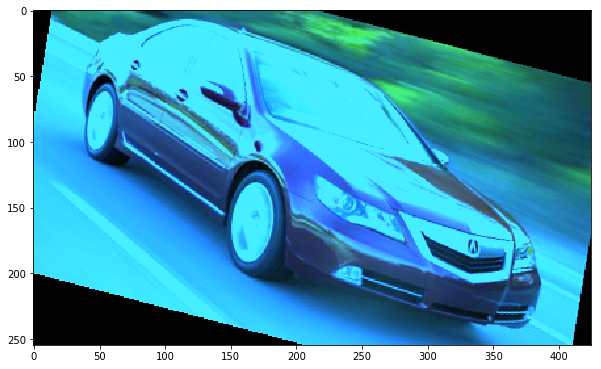

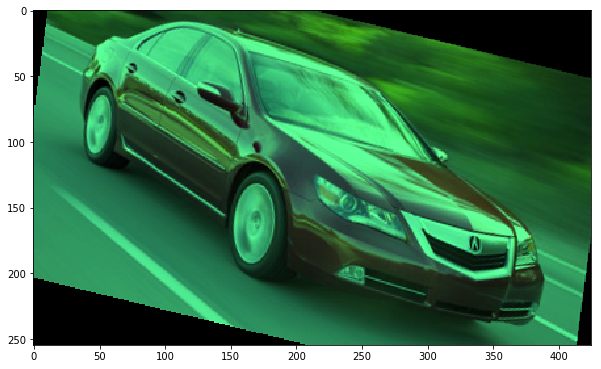

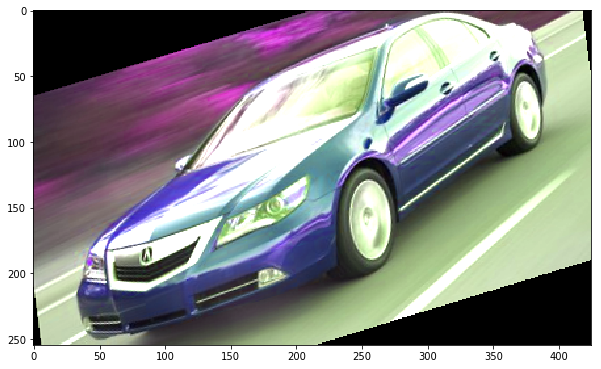

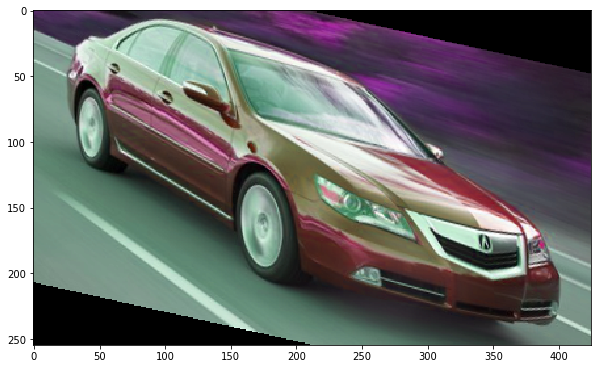

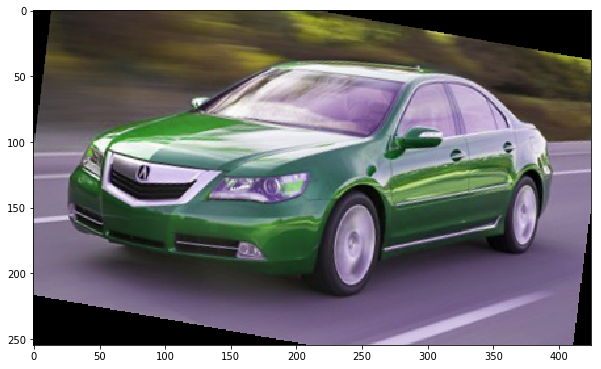

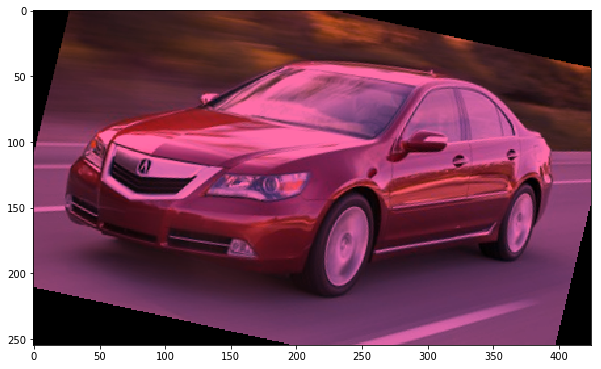

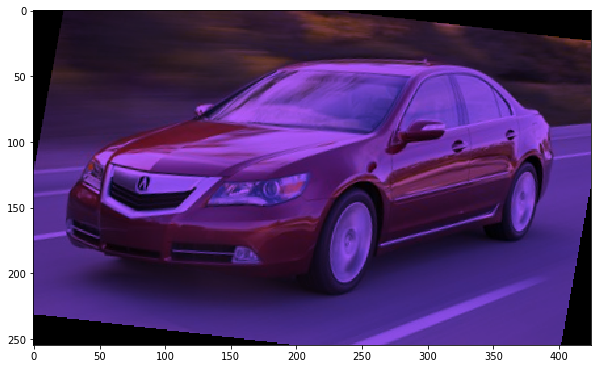

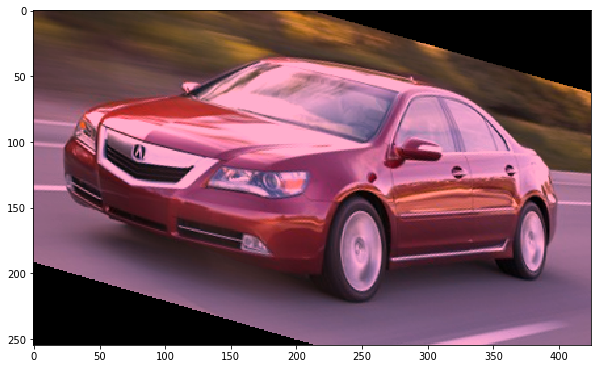

In [4]:
img = load_img('stanford-car-dataset-by-classes-folder/train_dataset/Acura RL Sedan 2012/00249.jpg')
fig = plt.figure(figsize=(10,20))
plt.imshow(img)
x = img_to_array(img)

for i in range(20):
    x_transformed = generator.random_transform(x)
    should_mess_up_colors = np.random.choice([0,1])
    if should_mess_up_colors == 1:
        x_transformed = mess_up_colors(x_transformed)
    else:
        x_transformed = swith_colors(x_transformed)
    img_transformed = array_to_img(x_transformed)
    fig = plt.figure(figsize=(10,20))
    plt.imshow(img_transformed)

## Augmentation

In [5]:
augment('./stanford-car-dataset-by-classes-folder/train_dataset', generator, factor=5)

Class 0 Bentley Continental_Flying_Spur Sedan 2007 augmented.
Class 1 Audi TT Coupe 2012 RS augmented.
Class 2 Buick Rainier SUV 2007 augmented.
Class 3 Audi A5 Coupe 2012 S5 augmented.
Class 4 Chevrolet HHR_SS Hatchback 2010 augmented.
Class 5 Chevrolet Corvette Coupe 2012 ZR1 augmented.
Class 6 Audi 100 Wagon 1994 augmented.
Class 7 Chevrolet Avalanche Crew_Cab 2012 augmented.
Class 8 Acura ZDX SUV 2012 augmented.
Class 9 Audi TT Coupe 2011 augmented.
Class 10 Acura TSX Sedan 2012 augmented.
Class 11 BMW X5 SUV 2007 augmented.
Class 12 Chevrolet Express_1 Van 2007 augmented.
Class 13 Bentley Continental_2 Coupe 2012 augmented.
Class 14 BMW X3 SUV 2012 augmented.
Class 15 BMW 1_Series Coupe 2012 augmented.
Class 16 Audi A5 Convertible 2012 augmented.
Class 17 Aston_Martin V8_Vantage Convertible 2012 augmented.
Class 18 BMW M3 Coupe 2012 augmented.
Class 19 Bentley Mulsanne Sedan 2011 augmented.
Class 20 Chevrolet Corvette Convertible 2012 augmented.
Class 21 Audi 100 Sedan 1994 augmen